<a href="https://colab.research.google.com/github/dmcghee173268/CS4410/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(font_scale=2)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

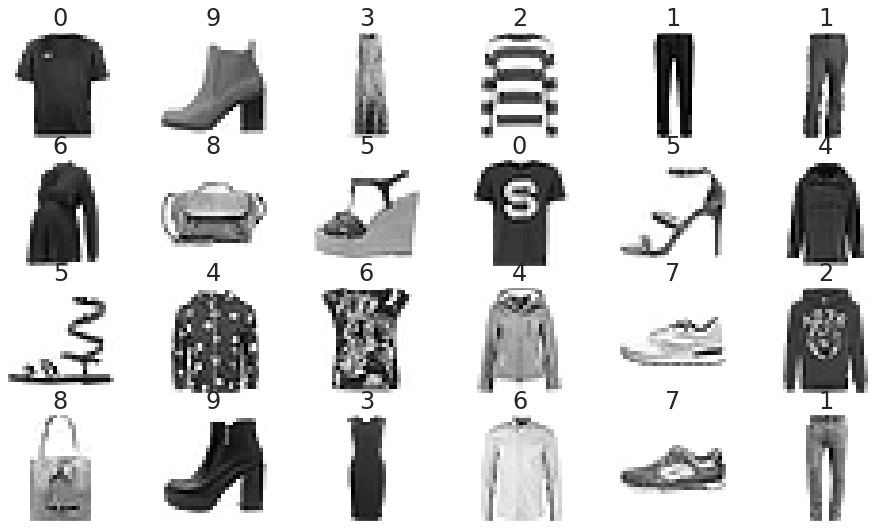

In [10]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout

In [11]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
X_train = X_train.astype('float32') / 255

In [16]:
X_test = X_test.astype('float32') / 255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
y_test = to_categorical(y_test)

In [22]:
y_test.shape

(10000, 10)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
cnn = Sequential()

In [25]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [26]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [27]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [29]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
cnn.add(Flatten())

In [31]:
cnn.add(Dense(units=128, activation='relu'))

In [32]:
cnn.add(Dense(units=10, activation='softmax'))

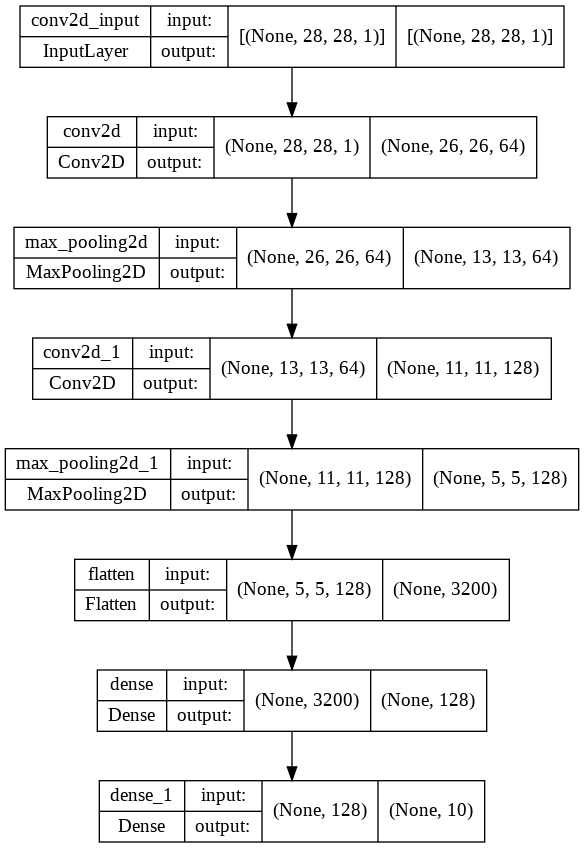

In [33]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename = 'convnet.png')

In [34]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 111s 130ms/step - loss: 0.4701 - accuracy: 0.8290 - val_loss: 0.3524 - val_accuracy: 0.8692
Epoch 2/5
844/844 [==============================] - 109s 129ms/step - loss: 0.3079 - accuracy: 0.8887 - val_loss: 0.3013 - val_accuracy: 0.8877
Epoch 3/5
844/844 [==============================] - 107s 127ms/step - loss: 0.2590 - accuracy: 0.9059 - val_loss: 0.2664 - val_accuracy: 0.9028
Epoch 4/5
844/844 [==============================] - 107s 127ms/step - loss: 0.2276 - accuracy: 0.9154 - val_loss: 0.2518 - val_accuracy: 0.9108
Epoch 5/5
844/844 [==============================] - 108s 128ms/step - loss: 0.2003 - accuracy: 0.9253 - val_loss: 0.2417 - val_accuracy: 0.9103


In [36]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2580 - accuracy: 0.9036


In [37]:
loss

0.25797170400619507

In [38]:
accuracy

0.9035999774932861

In [39]:
predictions = cnn.predict(X_test)

In [40]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000148978%
1: 0.0000095992%
2: 0.0002816932%
3: 0.0000001012%
4: 0.0000260788%
5: 0.0086263222%
6: 0.0000008376%
7: 0.0313440716%
8: 0.0000055950%
9: 99.9597012997%


In [42]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

if predicted != expected:
  incorrect_predictions.append(
      (i, images[i], predicted, expected))

In [43]:
len(incorrect_predictions)

0

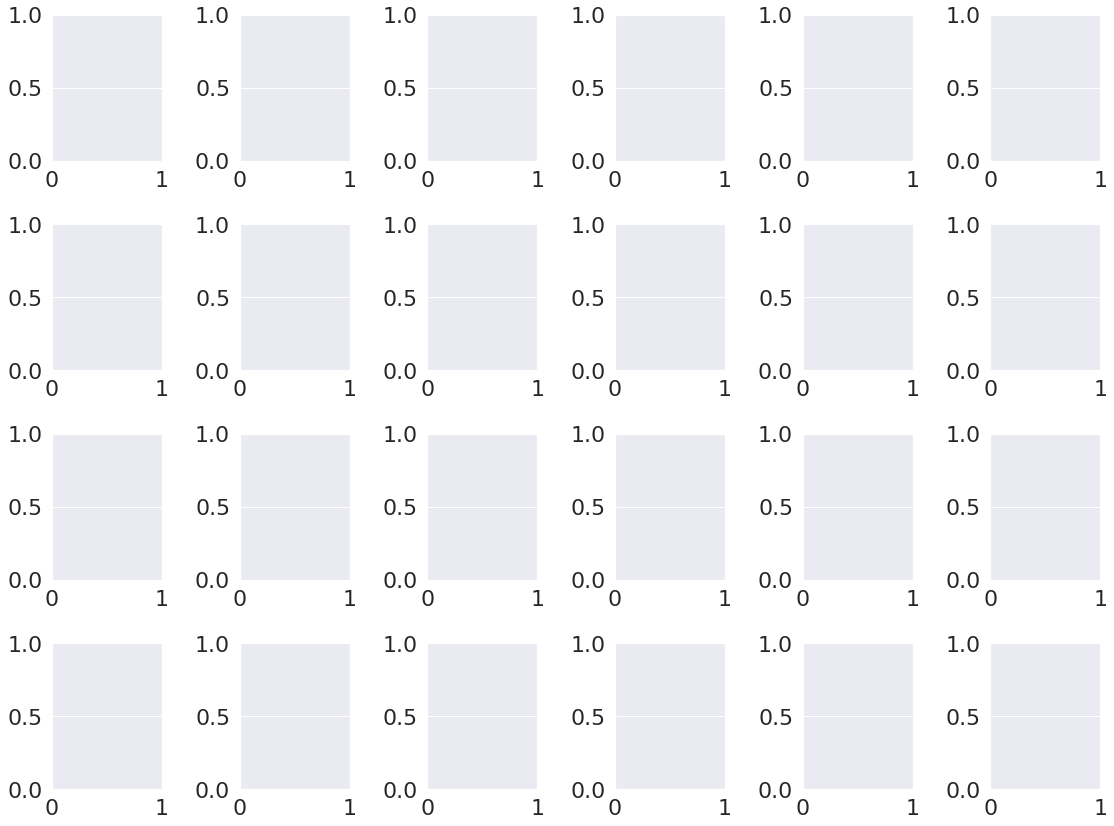

In [44]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(
      f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [45]:
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [46]:
display_probabilities(predictions[495])

0: 0.0001886491%
1: 0.0000040836%
2: 0.0001712152%
3: 0.0002249903%
4: 0.0002116501%
5: 86.4263117313%
6: 0.0002393160%
7: 0.0133714362%
8: 0.0002501803%
9: 13.5590210557%


In [47]:
display_probabilities(predictions[583])

0: 0.0000000312%
1: 0.0000000005%
2: 0.0000001623%
3: 0.0000000074%
4: 0.0000009632%
5: 0.0000125483%
6: 0.0000000006%
7: 0.0126903527%
8: 0.0000130817%
9: 99.9872803688%


In [48]:
display_probabilities(predictions[625])

0: 98.9170372486%
1: 0.0000330693%
2: 0.0149645261%
3: 0.0015204787%
4: 0.0000728079%
5: 0.0000515850%
6: 1.0652727447%
7: 0.0000011489%
8: 0.0010218325%
9: 0.0000234039%
